
# Handwritten Sales Data Extraction from Images

This notebook performs the following steps:

1. Load an image of handwritten sales data.
2. Preprocess the image through various transformations.
3. Extract text from the processed image.
4. Parse the extracted text into structured fields.
5. Export the structured data.
6. Visualize every transformation step.


In [18]:

# If running for the first time, uncomment the below lines to install required packages
# !apt install tesseract-ocr
# !pip install opencv-python pytesseract pandas matplotlib


In [29]:

import cv2
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Update if tesseract needs an explicit path on your system
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'


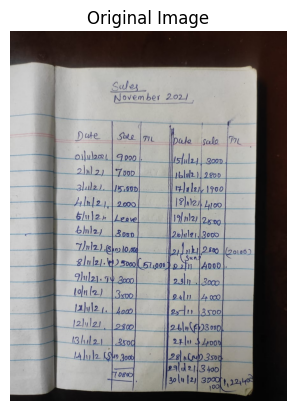

In [33]:

image_path = 'sample_sales.jpeg'  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


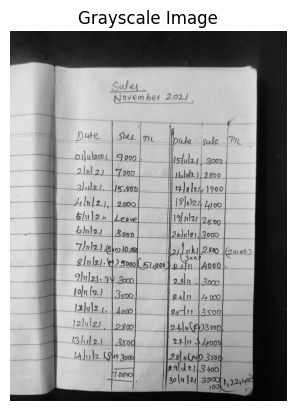

In [34]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


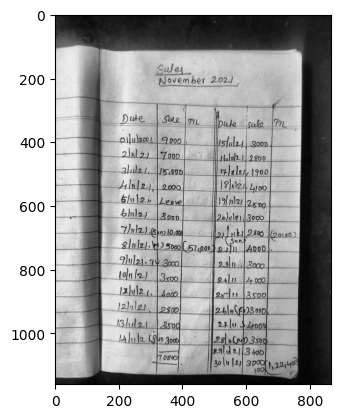

In [35]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(gray)

plt.imshow(enhanced, cmap='gray')

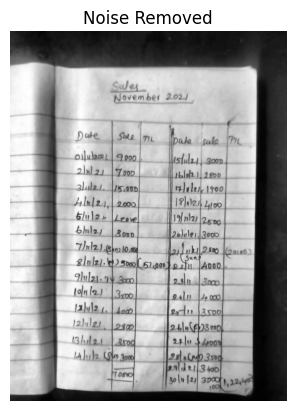

In [37]:

blurred = cv2.bilateralFilter(enhanced, d=9, sigmaColor=75, sigmaSpace=75)

plt.imshow(blurred, cmap='gray')
plt.title("Noise Removed")
plt.axis("off")
plt.show()


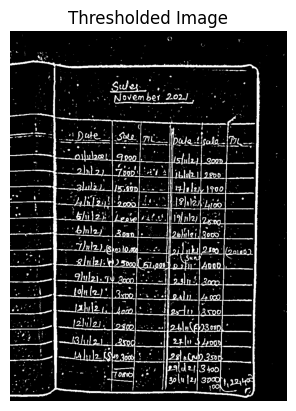

In [38]:

thresh = cv2.adaptiveThreshold(
    blurred, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY_INV, 
    11, 2
)


plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")
plt.show()


In [40]:

raw_text = pytesseract.image_to_string(blurred)
print("Extracted Text:\n", raw_text)

Extracted Text:
 '4‘
Nﬁysnnhcr I '4"

mug

o.]u\zmL
SW12)
gin};/.

A/nlz I.

5/11,2 ;-
6M1; 3;,”

7/M1) .E|m) lo.
8’In’1l»‘q)5°00

‘7M21- '1
(oin ,1) T

IJM21.
mi .VzJ_

3m

Whiz»
(Hull




In [26]:

lines = raw_text.strip().split("\n")
parsed_data = []
for line in lines:
    if line.strip():
        # Modify pattern as needed based on data format
        parts = line.split()
        if len(parts) >= 3:
            date = parts[0]
            item = ' '.join(parts[1:-1])
            amount = parts[-1]
            parsed_data.append({'Date': date, 'Item': item, 'Amount': amount})

df = pd.DataFrame(parsed_data)
df.head()


,Date,Item,Amount
0,".7._a,.._:Z;._",M.,C\
1,..,Tr «rt,3.
2,3...»;,.3: . .,.
3,".,\\=_u;.@.e_o_",\ ._:.»..a,"£37,"
4,m;.__:.4..uos,mi... abxwm. £8,.


In [27]:

df.to_csv("extracted_sales.csv", index=False)
print("Data exported to 'extracted_sales.csv'")


Data exported to 'extracted_sales.csv'


In [28]:

display(df)


,Date,Item,Amount
0,".7._a,.._:Z;._",M.,C\
1,..,Tr «rt,3.
2,3...»;,.3: . .,.
3,".,\\=_u;.@.e_o_",\ ._:.»..a,"£37,"
4,m;.__:.4..uos,mi... abxwm. £8,.
5,ii,._... mas C... .,938“
6,3:3,W8 2?,is
7,i__._»..,.38 Ex...,was
8,_c.____E.,NW8 .92..,95
